In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

In [55]:
app_train = pd.read_csv(f_app_train)
print(app_train.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0 

In [7]:
app_test = pd.read_csv(f_app_test)
print(app_test.head())

   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...             FLAG_DOCUMENT_18 FLAG_DOCUMENT_1

In [2]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [15]:
#print(app_train.head())
#print(app_train.columns)

In [16]:
#print(app_test.head())
#print(app_train.columns)

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
app_train.corr()['TARGET']

SK_ID_CURR                                 -0.002108
TARGET                                      1.000000
NAME_CONTRACT_TYPE                         -0.030896
FLAG_OWN_CAR                               -0.021851
FLAG_OWN_REALTY                            -0.006148
CNT_CHILDREN                                0.019187
AMT_INCOME_TOTAL                           -0.003982
AMT_CREDIT                                 -0.030369
AMT_ANNUITY                                -0.012817
AMT_GOODS_PRICE                            -0.039645
REGION_POPULATION_RELATIVE                 -0.037227
DAYS_BIRTH                                 -0.078239
DAYS_EMPLOYED                               0.074958
DAYS_REGISTRATION                           0.041975
DAYS_ID_PUBLISH                             0.051457
OWN_CAR_AGE                                 0.037612
FLAG_MOBIL                                  0.000534
FLAG_EMP_PHONE                              0.045982
FLAG_WORK_PHONE                             0.

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [47]:
corr_list = app_train.corr()['TARGET']

In [48]:
corr_list.sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


### Plot correlation

i=0, column=TARGET


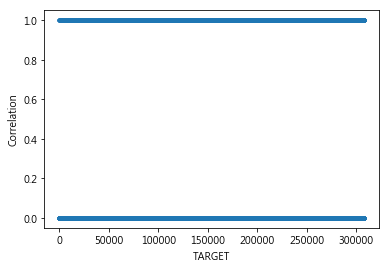

i=1, column=DAYS_BIRTH


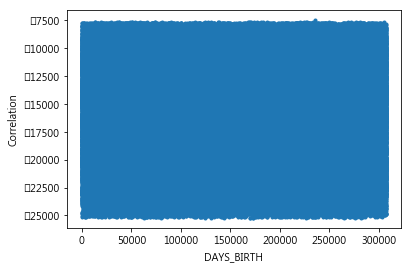

i=2, column=REGION_RATING_CLIENT_W_CITY


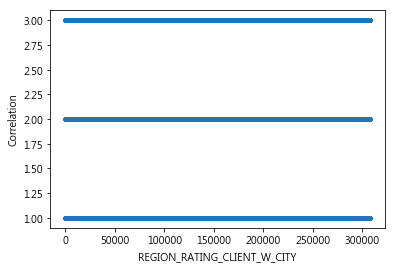

i=3, column=REGION_RATING_CLIENT


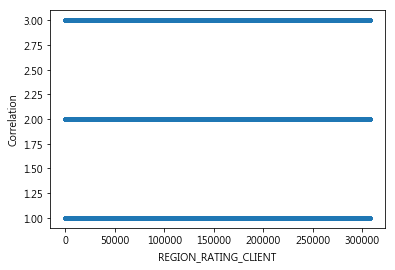

i=4, column=DAYS_LAST_PHONE_CHANGE


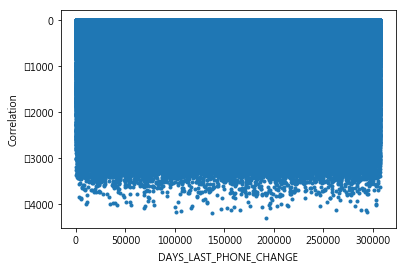

i=5, column=DAYS_ID_PUBLISH


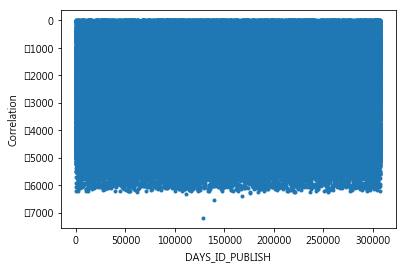

i=6, column=REG_CITY_NOT_WORK_CITY


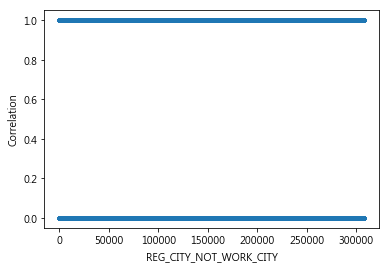

i=7, column=FLAG_EMP_PHONE


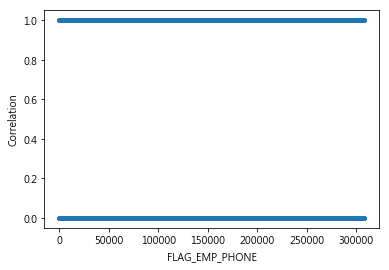

i=8, column=REG_CITY_NOT_LIVE_CITY


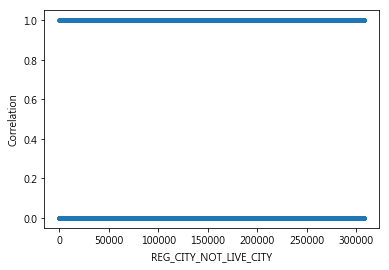

i=9, column=FLAG_DOCUMENT_3


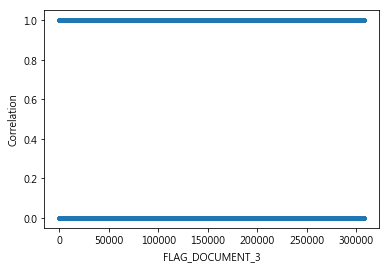

i=10, column=DAYS_REGISTRATION


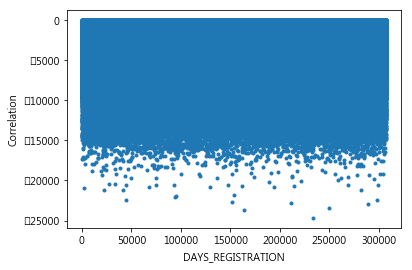

i=11, column=OWN_CAR_AGE


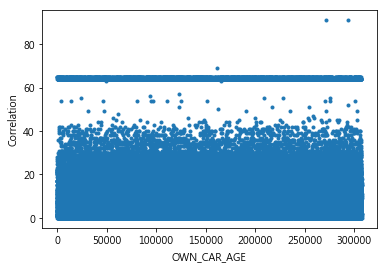

i=12, column=LIVE_CITY_NOT_WORK_CITY


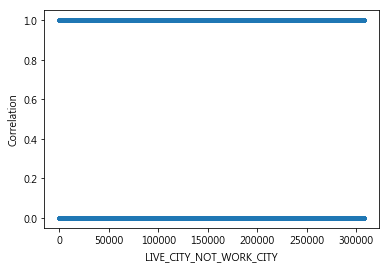

i=13, column=DEF_30_CNT_SOCIAL_CIRCLE


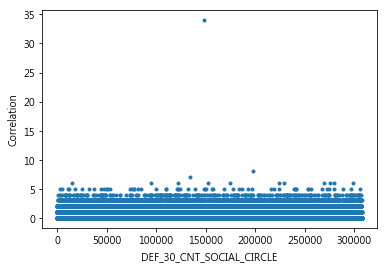

i=14, column=DEF_60_CNT_SOCIAL_CIRCLE


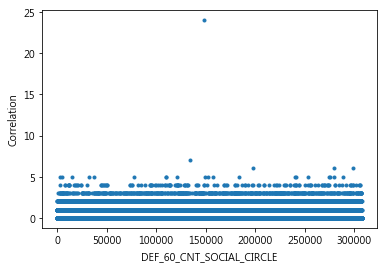

In [57]:
Top15_corr_columns = ["TARGET", "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY", "REGION_RATING_CLIENT", "DAYS_LAST_PHONE_CHANGE", 
                      "DAYS_ID_PUBLISH", "REG_CITY_NOT_WORK_CITY", "FLAG_EMP_PHONE", "REG_CITY_NOT_LIVE_CITY", "FLAG_DOCUMENT_3", 
                      "DAYS_REGISTRATION", "OWN_CAR_AGE", "LIVE_CITY_NOT_WORK_CITY", "DEF_30_CNT_SOCIAL_CIRCLE", 
                      "DEF_60_CNT_SOCIAL_CIRCLE"]
                      
for i, column in enumerate(Top15_corr_columns):
    print("i=%d, column=%s" %(i, column))
    plt.plot(app_train[column], '.')
    plt.xlabel(column)
    plt.ylabel('Correlation')
    plt.show()